In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = Path('data')
delta_quantity_path = Path.joinpath(data_dir, Path('delta_quantity_under_1b.npz'))

In [3]:
delta_quantity = np.load(delta_quantity_path)
print('δ quantity data is available for following orders:')
for order in delta_quantity.keys():
    print(order)

δ quantity data is available for following orders:
order_1
order_10
order_100
order_1000


In [4]:
orders = (1, 10, 100, 1000)
sizes = (50847532, 50847514, 50847334, 50845534)
minsize = min(sizes)
samples = 1e6
sample_indices = np.linspace(0, minsize-1, int(samples), dtype=np.uint64)
primes_quantity = np.arange(1, minsize+1, dtype=np.uint64)[sample_indices]
arrays = [delta_quantity[f'order_{o}'][sample_indices]/primes_quantity for o in orders]

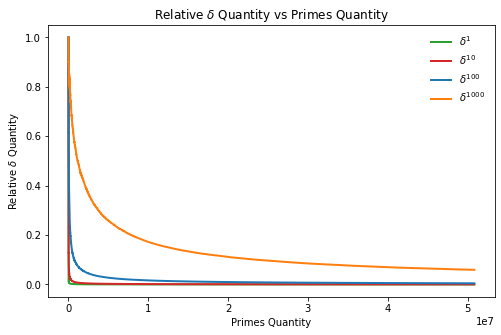

In [5]:
tab_linecolors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange', 'tab:purple']
figsize = (8, 5)
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(*figsize)
indexes = [0, 1, 2, 3]
for i in indexes:
    label = '$\delta^{' + f'{orders[i]}' + '}$'
    ax.plot(sample_indices, arrays[i], label=label, linewidth=2, color=tab_linecolors[i])
ax.set_title('Relative $\delta$ Quantity vs Primes Quantity')
ax.set_xlabel('Primes Quantity')
ax.set_xscale('linear')
ax.set_ylabel('Relative $\delta$ Quantity')
ax.set_yscale('linear')
ax.legend(frameon=False)
plt.show()